## Waste Managment using CNN Model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
warnings.filterwarnings('ignore')


In [4]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
       
        

100%|██████████| 9999/9999 [00:02<00:00, 3573.31it/s]


In [7]:
data = pd.DataFrame({'image':x_data, 'label':y_data})

In [8]:
data.shape

(22564, 2)

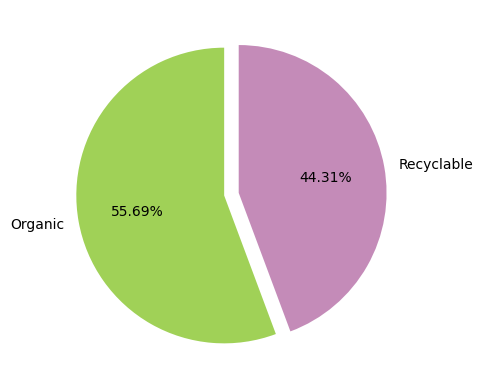

In [9]:
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional
plt.show()

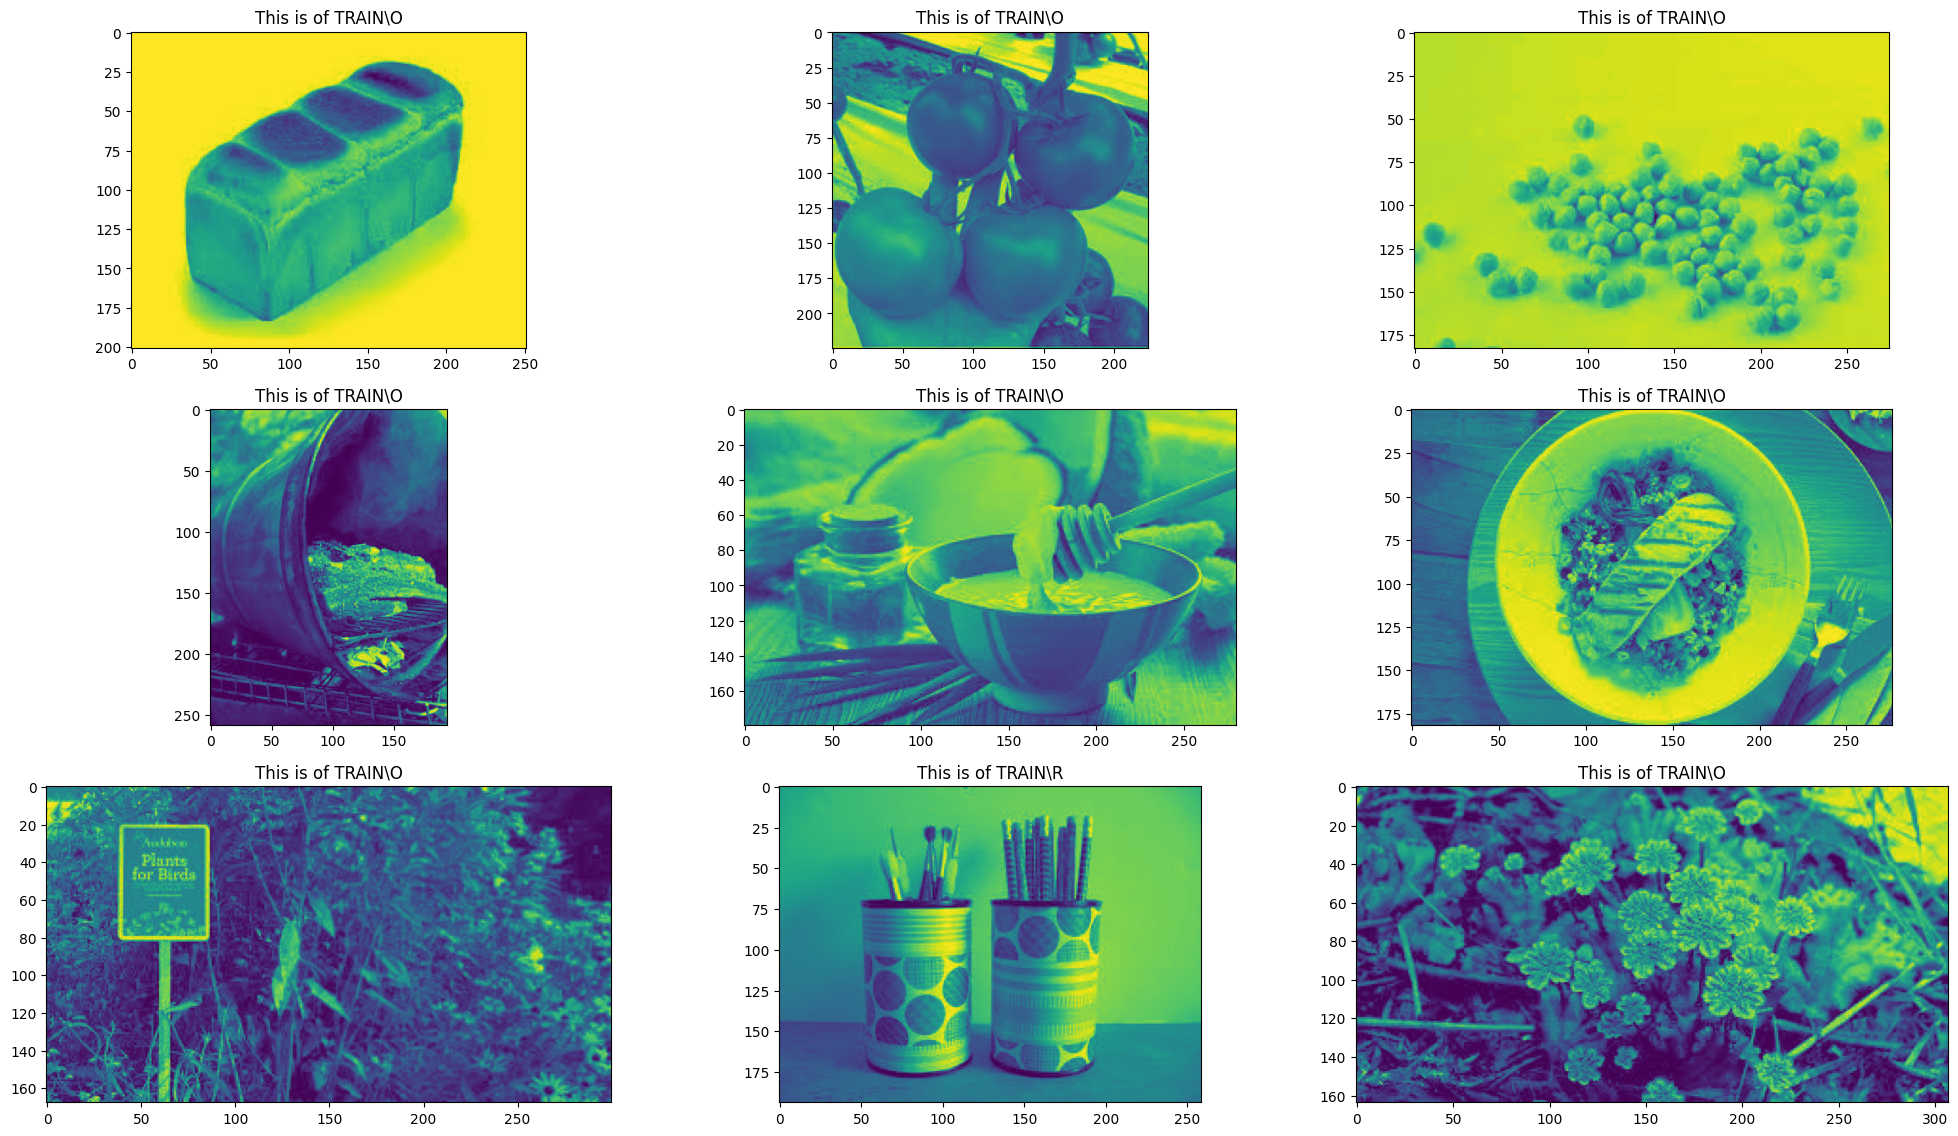

In [10]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])
batch_size=256

In [12]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [13]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [14]:
test_datagen= ImageDataGenerator(rescale= 1./255 )


In [15]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode ="rgb",
    class_mode = "categorical"
)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode ="rgb",
    class_mode = "categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [16]:
hist = model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.7577 - loss: 0.5308 - val_accuracy: 0.8480 - val_loss: 0.3717
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.8372 - loss: 0.4000 - val_accuracy: 0.8603 - val_loss: 0.3446
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.8586 - loss: 0.3502 - val_accuracy: 0.8587 - val_loss: 0.3584
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.8700 - loss: 0.3189 - val_accuracy: 0.8770 - val_loss: 0.3123
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - accuracy: 0.8726 - loss: 0.3109 - val_accuracy: 0.8977 - val_loss: 0.2661
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - accuracy: 0.8936 - loss: 0.2715 - val_accuracy: 0.9005 - val_loss: 0.2664
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - accuracy: 0.9146 - loss: 0.2211 - val_accuracy: 0.8918 - val_loss: 0.3073
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.9323 - loss: 0.1810 - val_accuracy: 0.8834 - v